<a href="https://colab.research.google.com/github/Prashantlondhe123/ML-Project/blob/main/Boston_House_Pricing_Prediction(sklearn_genetic_opt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Boston House Pricing Prediction(sklearn-genetic-opt)


In [6]:
pip install sklearn-genetic-opt

In [29]:
import matplotlib.pyplot as plt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Integer, Categorical, Continuous
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn_genetic.callbacks import LogbookSaver, ProgressBar
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

##Import the data and split it in train and test sets

In [30]:
data = load_boston()

y = data["target"]
X = data["data"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

##Define the classifier to tune

In [31]:
clf = DecisionTreeRegressor()
pipe = Pipeline([("scaler", StandardScaler()), ("clf", clf)])

##Create the CV strategy and define the param grid

In [32]:
cv = KFold(n_splits=5, shuffle=True)

param_grid = {
    "clf__ccp_alpha": Continuous(0, 1),
    "clf__criterion": Categorical(["mse", "mae"]),
    "clf__max_depth": Integer(2, 20),
    "clf__min_samples_split": Integer(2, 30)}

##Define the GASearchCV options

In [33]:
evolved_estimator = GASearchCV(
    estimator=pipe,
    cv=3,
    scoring="r2",
    population_size=15,
    generations=20,
    tournament_size=3,
    elitism=True,
    keep_top_k=4,
    crossover_probability=0.9,
    mutation_probability=0.05,
    param_grid=param_grid,
    criteria="max",
    algorithm="eaMuCommaLambda",
    n_jobs=-1)

##Optionally, create some Callbacks

In [34]:
callbacks = [LogbookSaver(checkpoint_path="./logbook.pkl"), ProgressBar()]

##Fit the model and see some results

In [35]:
evolved_estimator.fit(X_train, y_train, callbacks=callbacks)
y_predict_ga = evolved_estimator.predict(X_test)
r_squared = r2_score(y_test, y_predict_ga)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


  0%|          | 0/21 [00:00<?, ?it/s]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	15    	0.618719	0.0777857  	0.708233   	0.494515   
1  	30    	0.673013	0.0455225  	0.754357   	0.542149   
2  	30    	0.697758	0.0220263  	0.745598   	0.674779   
3  	28    	0.696309	0.0061839  	0.712143   	0.68899    
4  	29    	0.707353	0.0124588  	0.727295   	0.691941   
5  	29    	0.704893	0.00483685 	0.710823   	0.693692   
6  	29    	0.701044	0.00570255 	0.710761   	0.689817   
7  	29    	0.700185	0.0083673  	0.708711   	0.674775   
8  	30    	0.705503	0.00491664 	0.713227   	0.699851   
9  	30    	0.704282	0.00322102 	0.7113     	0.701063   
10 	29    	0.70439 	0.00395731 	0.710402   	0.694325   
11 	28    	0.703768	0.00303268 	0.708253   	0.697106   
12 	30    	0.706249	0.00533446 	0.713966   	0.694072   
13 	29    	0.704178	0.00415126 	0.709551   	0.692483   
14 	29    	0.705503	0.0070134  	0.71223    	0.689533   
15 	28    	0.707284	0.0035667  	0.711458   	0.699883   
16 	30    	0.70384 	0.00788254 	0.71417    	0.69

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


In [36]:
print(evolved_estimator.best_params_)
print("r-squared: ", "{:.2f}".format(r_squared))
print("Best k solutions: ", evolved_estimator.hof)

{'clf__ccp_alpha': 0.03389505088041678, 'clf__criterion': 'mae', 'clf__max_depth': 13, 'clf__min_samples_split': 4}
r-squared:  0.67
Best k solutions:  {0: {'clf__ccp_alpha': 0.03389505088041678, 'clf__criterion': 'mae', 'clf__max_depth': 13, 'clf__min_samples_split': 4}, 1: {'clf__ccp_alpha': 0.03389505088041678, 'clf__criterion': 'mae', 'clf__max_depth': 18, 'clf__min_samples_split': 4}, 2: {'clf__ccp_alpha': 0.03389505088041678, 'clf__criterion': 'mae', 'clf__max_depth': 5, 'clf__min_samples_split': 4}, 3: {'clf__ccp_alpha': 0.03389505088041678, 'clf__criterion': 'mse', 'clf__max_depth': 5, 'clf__min_samples_split': 4}}


In [37]:
r2_score(y_test, y_predict_ga)


0.6731527232339924

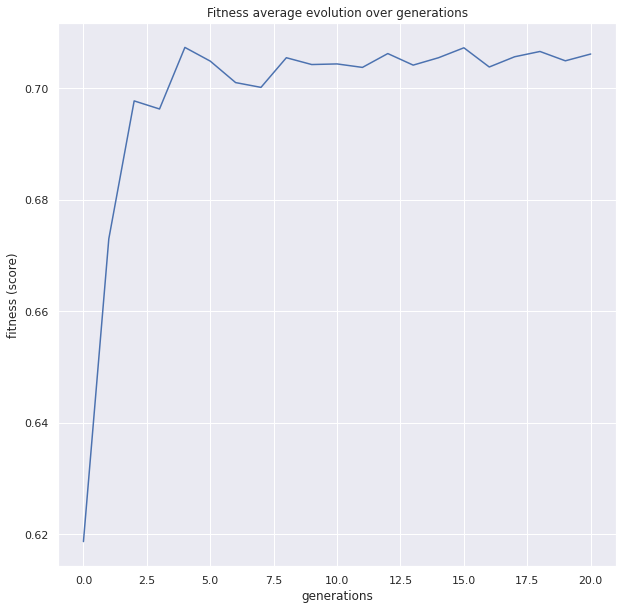

In [38]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()

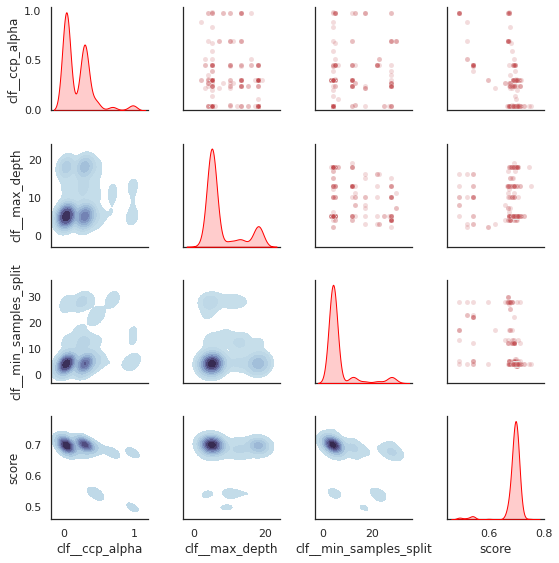

In [39]:
plot_search_space(evolved_estimator)
plt.show()